In [1]:
from marmot.scenariohandlers import SIIPScenario
import os
import pandas as pd

spath = r'C:\Users\MWEBB\Downloads\NTPS Results\Aggregates'
gen_zone_path = os.path.normpath(r'C:\Users\MWEBB\Downloads\NTPS Results\mappings\gen_zone_map.json')
region_zone_path = os.path.normpath(r'C:\Users\MWEBB\Downloads\NTPS Results\mappings\region_zone_map.json')

ntps = SIIPScenario(spath, gen_zone_path, region_zone_path)

loading = ntps.get_line_flow_data()
loading.head()

,ORRINGTON_100002_S3023SCAP_100004~2,ORRINGTON_100002_MPCO_396_EM_100052~Z1,ORRINGTON_100002_S388SCAP_103004~2,ORRINGTON_100002_BR3016_190237~1,S3023SCAP_100004_ALBION ROAD_100092~1,COOPERS MILL_100005_MAINE YANKEE_100086~2,COOPERS MILL_100005_MAINE YANKEE_100086~1,COOPERS MILL_100005_ALBION ROAD_100092~1,COOPERS MILL_100005_LARRABEE RD_100095~1,COOPERS MILL_100005_S388SCAP_103004~1,...,BUSNAME_700025_BUSNAME_700026~2,BUSNAME_700025_BUSNAME_700026~1,BUSNAME_700025_BUSNAME_700032~1,BUSNAME_700025_BUSNAME_700032~2,BUSNAME_700026_BUSNAME_700027~1,BUSNAME_700026_BUSNAME_700027~2,BUSNAME_700026_BUSNAME_700030~2,BUSNAME_700026_BUSNAME_700030~1,BUSNAME_700030_BUSNAME_700031~1,BUSNAME_700030_BUSNAME_700031~2
DateTime,,,,,,,,,,,,,,,,,,,,,
2035-01-01 00:00:00,1242.178944,-2399.262552,2406.941358,-1385.807134,1242.178944,1643.272993,1564.381625,-2290.810041,1502.470490,-2406.941358,...,4234.813278,4234.813278,-3189.249236,-3189.249236,2348.706654,2348.706654,2633.971659,2633.971659,3091.593770,3091.593770
2035-01-01 01:00:00,1277.287404,-2435.239141,2453.689066,-1424.234497,1277.287404,1669.369614,1589.418586,-2322.765815,1536.254190,-2453.689066,...,3650.430425,3650.430425,-2635.695426,-2635.695426,2152.877274,2152.877274,2291.964755,2291.964755,2799.465362,2799.465362
2035-01-01 02:00:00,1292.915888,-2457.524179,2481.029223,-1439.563620,1292.915888,1684.638083,1603.945120,-2347.089586,1562.566617,-2481.029223,...,3641.884087,3641.884087,-2606.294649,-2606.294649,2181.086570,2181.086570,2296.884036,2296.884036,2851.421696,2851.421696
2035-01-01 03:00:00,1305.110327,-2472.299216,2501.348273,-1456.998144,1305.110327,1696.654646,1615.374208,-2364.467666,1577.560013,-2501.348273,...,3625.617382,3625.617382,-2583.372204,-2583.372204,2201.032115,2201.032115,2289.984703,2289.984703,2881.052079,2881.052079
2035-01-01 04:00:00,1312.909381,-2474.568216,2494.428932,-1457.825360,1312.909381,1685.750119,1605.027605,-2344.967435,1570.421144,-2494.428932,...,3322.413196,3322.413196,-2276.496409,-2276.496409,2116.480210,2116.480210,2100.777685,2100.777685,2738.701630,2738.701630


<Axes: title={'center': 'Interface: ORRINGTON_100002_S3023SCAP_100004~2'}, ylabel='Flow (MW)'>

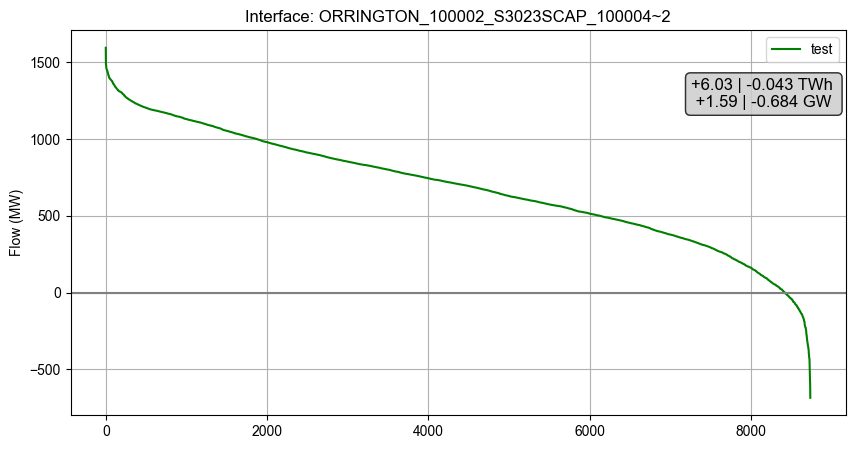

In [2]:
ex_col = loading.columns[0]

import marmot.quickplots as qp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

qp.plot_flow(loading, ex_col, 'test',ax=ax, annotate=True)

In [3]:
single_loading = loading[loading.columns[0]]

hourly_stats = single_loading.groupby(single_loading.index.hour).agg(['std','mean'])

hourly_stats.head()


,std,mean
DateTime,,
0,322.881036,594.832231
1,315.838522,575.162109
2,318.926934,566.062454
3,311.471044,560.538048
4,308.844642,564.728152


In [4]:
flow_stats = single_loading.apply(lambda x: x if x>=0 else 0.0).agg(['sum','max'])
rflow_stats = single_loading.apply(lambda x: abs(x) if x<0 else 0.0).agg(['sum','max'])

print(flow_stats)
print(rflow_stats)

sum    6.034714e+06
max    1.594360e+03
Name: ORRINGTON_100002_S3023SCAP_100004~2, dtype: float64
sum    42962.542087
max      684.360775
Name: ORRINGTON_100002_S3023SCAP_100004~2, dtype: float64


Text(0, 0.5, 'Loading %')

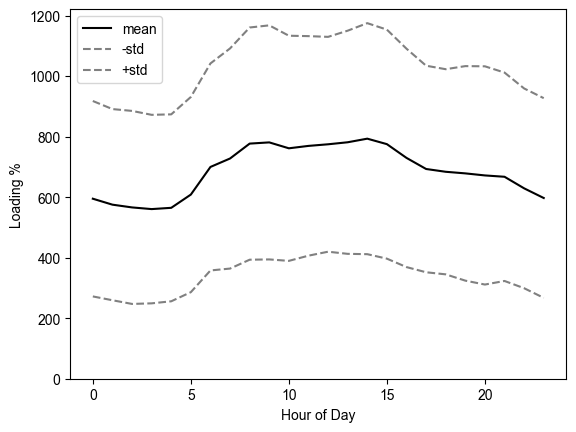

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

hourly_stats['+std'] = hourly_stats['mean'] + hourly_stats['std']
hourly_stats['-std'] = hourly_stats['mean'] - hourly_stats['std']

hourly_stats.plot(y=['mean'], linestyle='-',color='black',ax=ax)
hourly_stats.plot(y=['-std','+std'], linestyle='--',color='grey',ax=ax)

ax.set_ylim(0)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Loading %')

In [6]:
single_loading = loading[loading.columns[0]].to_frame()
single_loading['hour'] = single_loading.index.hour
single_loading['date'] = single_loading.index.date

single_loading_piv = single_loading.pivot(columns='hour', index='date').droplevel(0, axis=1)
single_loading_piv.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2035-01-01,1242.178944,1277.287404,1292.915888,1305.110327,1312.909381,1312.800939,1306.613408,1281.901385,1333.174317,1359.632454,...,1177.633157,896.607030,878.348204,826.323850,786.562923,767.598439,779.128298,801.975938,825.445552,857.324077
2035-01-02,880.794414,912.349517,925.997558,930.844308,934.434994,920.735446,882.842264,1230.541165,1335.906495,1380.193082,...,768.723936,604.750069,818.248119,810.396207,722.954203,686.852925,370.386744,343.603244,273.181456,-0.976439
2035-01-03,71.666739,111.681166,87.075050,72.371338,72.945528,45.444777,-33.547782,22.501417,307.991489,556.896535,...,1023.411505,725.434447,371.474135,593.341258,573.391218,587.406094,598.477028,629.101904,675.930766,720.337528
2035-01-04,787.750216,840.777400,832.549467,791.507059,779.323325,759.065800,701.432366,621.804229,806.966099,722.611543,...,1115.349859,866.692143,577.314719,943.540459,898.060594,913.017741,889.084201,894.674259,927.559375,959.587522
2035-01-05,569.756511,489.348087,392.275186,402.006578,484.152108,446.769213,380.677664,250.060062,195.062034,95.733319,...,968.137424,941.710153,759.287358,685.999839,643.541952,652.868655,668.679607,701.991993,732.935824,776.291100


<Axes: title={'center': 'Mean Hourly Flow Profile'}, xlabel='Hour of Day', ylabel='Flow Distribution (MW)'>

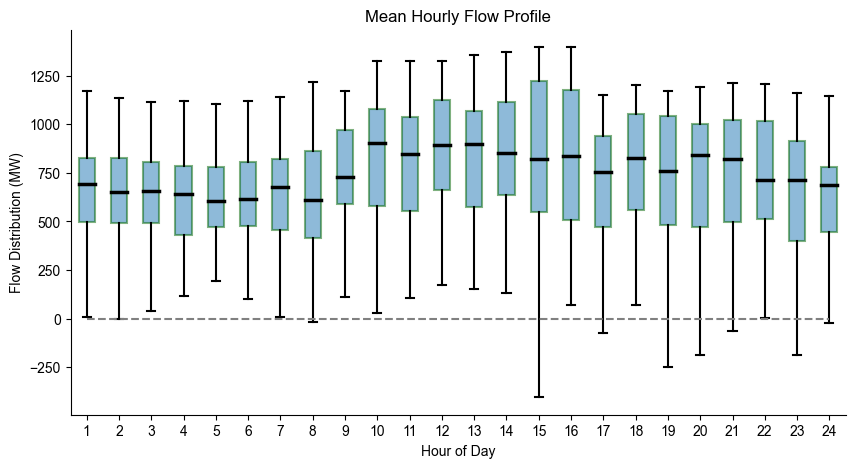

In [7]:

fig, ax = plt.subplots(figsize=(10,5))
qp.plot_hourly_boxplot(loading.loc[loading.index.month ==2][ex_col], ax)


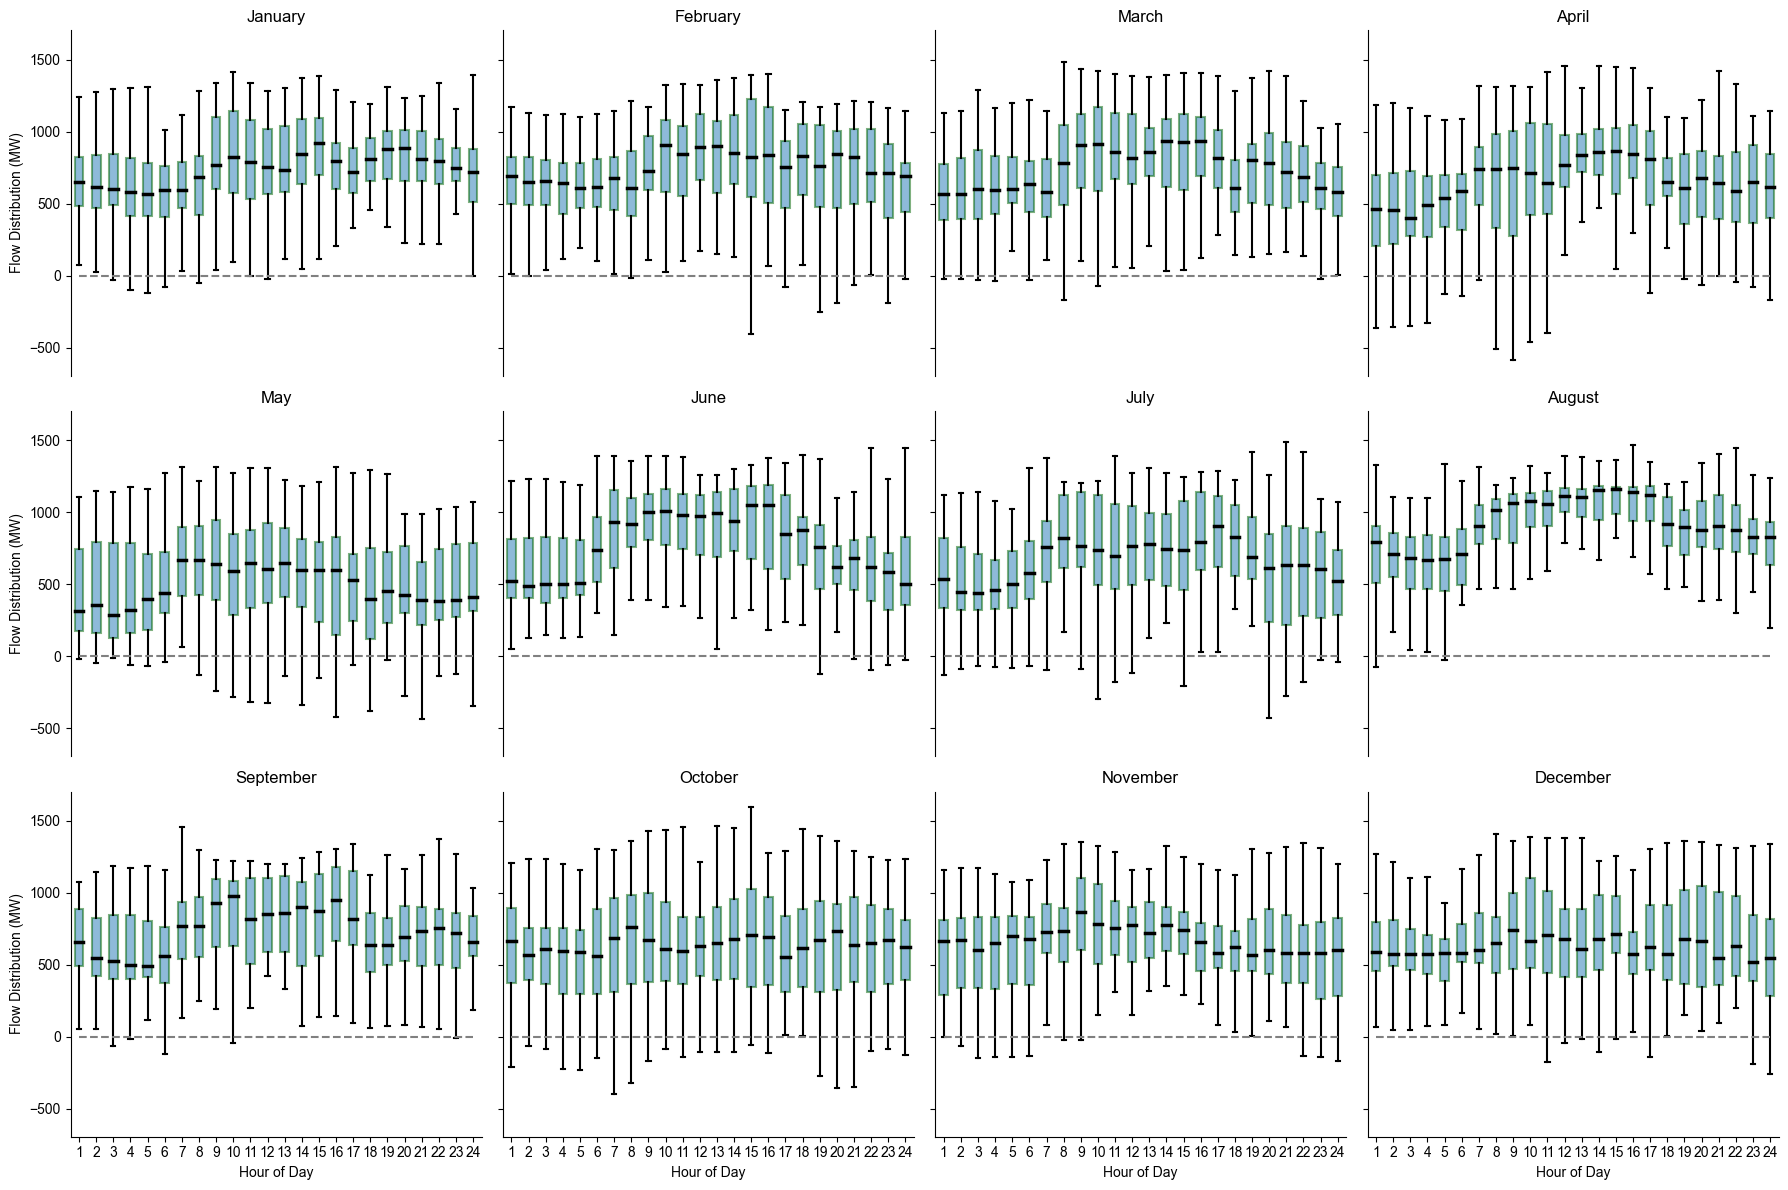

In [8]:

fig, axs = qp.plot_hourly_box_monthly(loading[ex_col]) 
plt.tight_layout()
plt.show()

In [9]:
dispatch = ntps.get_entity_tech_load_aggregates()

dispatch.head()

Entity                       FRCC                                               
Technology                Battery         Coal Curtailment        Demand  Gas   
DateTime                                                                        
2035-01-01 00:00:00  16327.188041  1497.000000         0.0  24809.179514  0.0  \
2035-01-01 01:00:00   6557.993391  1497.000000         0.0  23271.560855  0.0   
2035-01-01 02:00:00   5299.941205  1497.000000         0.0  21817.554542  0.0   
2035-01-01 03:00:00   8963.578717  1497.000161         0.0  20941.767734  0.0   
2035-01-01 04:00:00   8641.473197  1497.000000         0.0  20652.821451  0.0   

Entity                                                        ...   
Technology          Gas-CC Gas-CT Hydro Landfill-Gas Nuclear  ...   
DateTime                                                      ...   
2035-01-01 00:00:00    0.0    0.0  34.0          0.0  3724.3  ...  \
2035-01-01 01:00:00    0.0    0.0  34.0          0.0  3724.3  ...   
2035-01-01 02:00:00    0.0    0.0  34.0          0.0  3724.3  ...   
2035-01-01 03:00:00    0.0    0.0  34.0          0.0  3724.3  ...   
2035-01-01 04:00:00    0.0    0.0  34.0          0.0  3724.3  ...   

Entity              Saskatchewan                                               
Technology                  Coal Curtailment       Demand  Gas Gas-CC Gas-CT   
DateTime                                                                       
2035-01-01 00:00:00  1387.500000         0.0  2487.594976  0.0  244.5    0.0  \
2035-01-01 01:00:00  1387.500000         0.0  2394.219372  0.0    0.0    0.0   
2035-01-01 02:00:00  1387.500000         0.0  2363.249474  0.0    0.0    0.0   
2035-01-01 03:00:00  1387.500000         0.0  2311.474183  0.0    0.0    0.0   
2035-01-01 04:00:00  1322.243186         0.0  2300.045815  0.0    0.0    0.0   

Entity                                             
Technology           Hydro Other   PV        Wind  
DateTime                                           
2035-01-01 00:00:00  201.8   0.0  0.0  437.137724  
2035-01-01 01:00:00   14.0   0.0  0.0  437.137724  
2035-01-01 02:00:00   14.0   0.0  0.0  427.026410  
2035-01-01 03:00:00   14.0   0.0  0.0  403.612940  
2035-01-01 04:00:00   14.0   0.0  0.0  416.895909  

[5 rows x 157 columns]

<Axes: ylabel='Generation and Demand (GW)'>

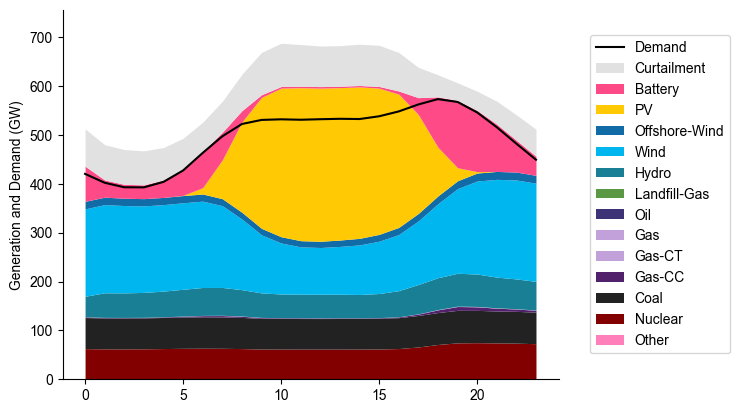

In [10]:
dispatch_hour_mean = dispatch.groupby(dispatch.index.hour).mean().groupby(level='Technology', axis=1).sum()
qp.plot_stacked_area_window(dispatch_hour_mean)

# facet by entity or month

# Do two demand curves, one without battery and one with battery

# Look into why a small amount of battery discharge is showing (Jarrad)

['PV', 'Offshore-Wind', 'Wind']


(0.0, 1206.355751933041)

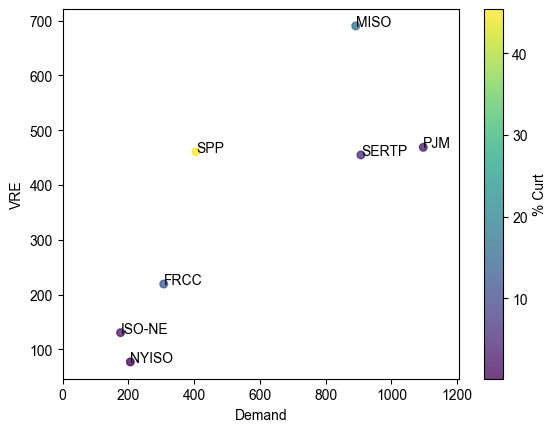

In [11]:
#demand vs vre

scatter_cols = qp.curt_tech #+ ['Demand']

sub_cols = list(set.intersection(set(scatter_cols) , set(dispatch.columns.get_level_values(1).unique())))

print(sub_cols)
conus_vre = dispatch.swaplevel(0,1, axis=1)[sub_cols].groupby(level='Entity', axis=1).sum().sum()/qp.MW_to_TW
conus_vre.name = 'VRE'

conus_curt = dispatch.swaplevel(0,1, axis=1)['Curtailment'].groupby(level='Entity', axis=1).sum().sum()/qp.MW_to_TW
conus_curt.name = 'Curtailment'

conus_demand = dispatch.swaplevel(0,1, axis=1)['Demand'].groupby(level='Entity', axis=1).sum().sum()/qp.MW_to_TW
conus_demand.name = 'Demand'

fig, ax = plt.subplots()

sub_df = pd.merge(conus_vre, conus_demand, left_index=True, right_index=True).merge(conus_curt, left_index=True, right_index=True).drop(index=['Quebec', 'Manitoba', 'NewBrunswick','NovaScotia','Saskatchewan', 'Ontario'])
sub_df['% Curt'] = 100*sub_df['Curtailment']/(sub_df['VRE'] + sub_df['Curtailment'])

# Find correct size
sub_df.plot.scatter(x='Demand', y='VRE',s=30, c='% Curt', alpha=0.75, ax=ax)

for entity in sub_df.index.unique():
    data = sub_df.loc[entity]
    x, y = data['Demand'], data['VRE']
    ax.annotate(entity, xy=(x,y))#, xycoords='offset pixels', xytext=(10,10))
#ax.scatter(x=conus_demand.sum()/qp.MW_to_TW, y=conus_vre.sum()/qp.MW_to_TW, alpha=0.5)
ax.set_xlim(0, 1.1*max(sub_df['Demand']))

